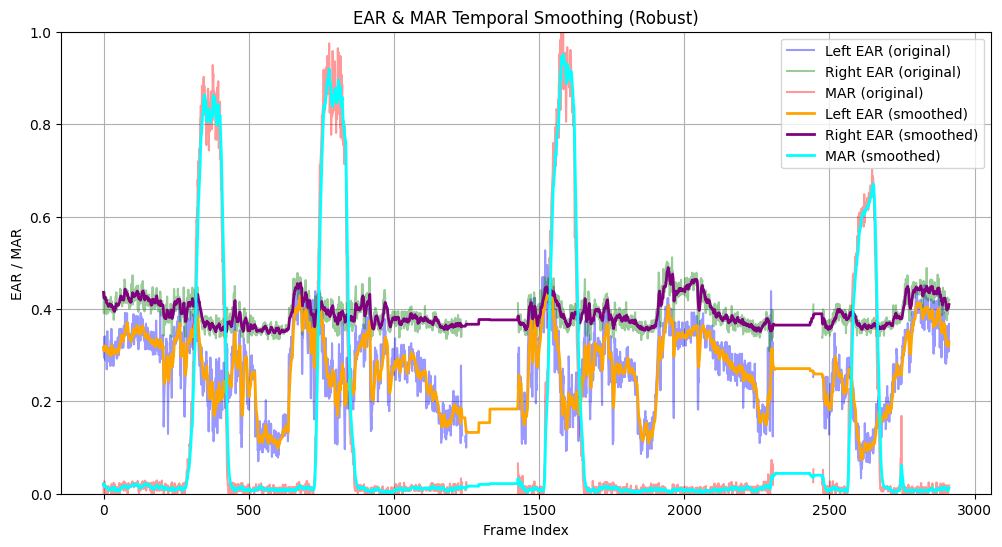

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Robust Exponential Smoothing
# -----------------------------
def robust_exponential_smoothing(series, alpha=0.2):
    """
    Exponential smoothing that handles NaNs.
    If value is NaN, keeps previous smoothed value.
    """
    smoothed = []
    prev = None
    for val in series:
        if np.isnan(val):
            smoothed_val = prev if prev is not None else 0
        else:
            smoothed_val = alpha * val + (1 - alpha) * prev if prev is not None else val
        smoothed.append(smoothed_val)
        prev = smoothed_val
    return smoothed

# -----------------------------
# Load Data
# -----------------------------
file_path = "/content/020_noglasses_sleepyCombination_EAR_MAR.txt"
df = pd.read_csv(file_path, header=None, names=["timestamp", "left_ear", "right_ear", "mar"])

# -----------------------------
# Apply Robust Smoothing
# -----------------------------
alpha = 0.2  # smoothing factor
df["left_ear_smooth"] = robust_exponential_smoothing(df["left_ear"], alpha)
df["right_ear_smooth"] = robust_exponential_smoothing(df["right_ear"], alpha)
df["mar_smooth"] = robust_exponential_smoothing(df["mar"], alpha)

# -----------------------------
# Plot Original + Smoothed
# -----------------------------
plt.figure(figsize=(12, 6))

# Original (semi-transparent)
plt.plot(df["timestamp"], df["left_ear"], label="Left EAR (original)", color="blue", alpha=0.4)
plt.plot(df["timestamp"], df["right_ear"], label="Right EAR (original)", color="green", alpha=0.4)
plt.plot(df["timestamp"], df["mar"], label="MAR (original)", color="red", alpha=0.4)

# Smoothed (bright distinct colors)
plt.plot(df["timestamp"], df["left_ear_smooth"], label="Left EAR (smoothed)", color="orange", linewidth=2)
plt.plot(df["timestamp"], df["right_ear_smooth"], label="Right EAR (smoothed)", color="purple", linewidth=2)
plt.plot(df["timestamp"], df["mar_smooth"], label="MAR (smoothed)", color="cyan", linewidth=2)

plt.xlabel("Frame Index")
plt.ylabel("EAR / MAR")
plt.title("EAR & MAR Temporal Smoothing (Robust)")
plt.ylim(0, 1)
plt.legend()
plt.grid(True)
plt.show()


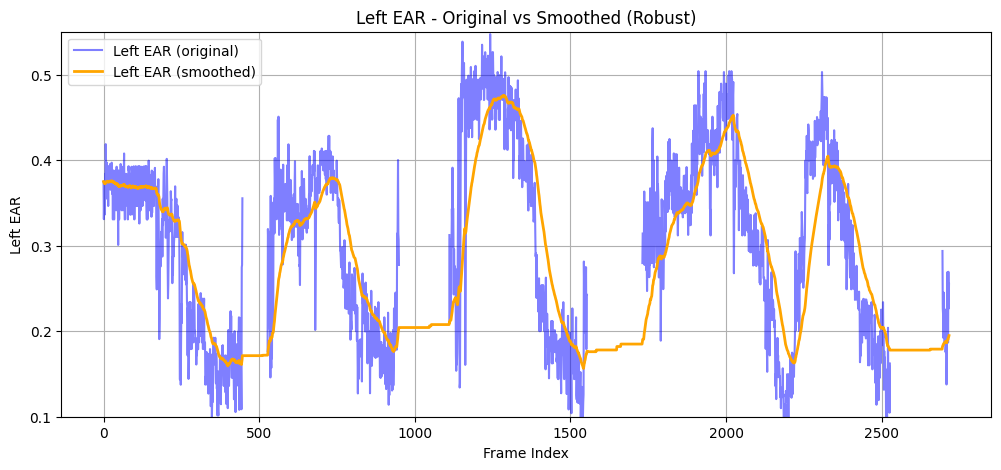

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Robust Exponential Smoothing
# -----------------------------
def robust_exponential_smoothing(series, alpha=0.2):
    """
    Exponential smoothing that handles NaN values gracefully.
    If a value is NaN, it keeps the previous smoothed value.
    """
    smoothed = []
    prev = None
    for val in series:
        if np.isnan(val):
            # Use previous smoothed value if current is NaN
            smoothed_val = prev if prev is not None else 0
        else:
            smoothed_val = alpha * val + (1 - alpha) * prev if prev is not None else val
        smoothed.append(smoothed_val)
        prev = smoothed_val
    return smoothed

# -----------------------------
# Load Data
# -----------------------------
file_path = "/content/020_noglasses_slowBlinkWithNodding_EAR_MAR.txt"
df = pd.read_csv(file_path, header=None, names=["timestamp", "left_ear", "right_ear", "mar"])

# -----------------------------
# Apply Robust Smoothing
# -----------------------------
alpha = 0.025  # smoothing factor (adjust for smoother/faster response)
df["left_ear_smooth"] = robust_exponential_smoothing(df["left_ear"], alpha)

# -----------------------------
# Plot Left EAR Only
# -----------------------------
plt.figure(figsize=(12, 5))
plt.plot(df["timestamp"], df["left_ear"], label="Left EAR (original)", color="blue", alpha=0.5)
plt.plot(df["timestamp"], df["left_ear_smooth"], label="Left EAR (smoothed)", color="orange", linewidth=2)

plt.xlabel("Frame Index")
plt.ylabel("Left EAR")
plt.title("Left EAR - Original vs Smoothed (Robust)")
plt.ylim(0.1, 0.55)  # adjust to your data range
plt.legend()
plt.grid(True)
plt.show()


#Kalman filter

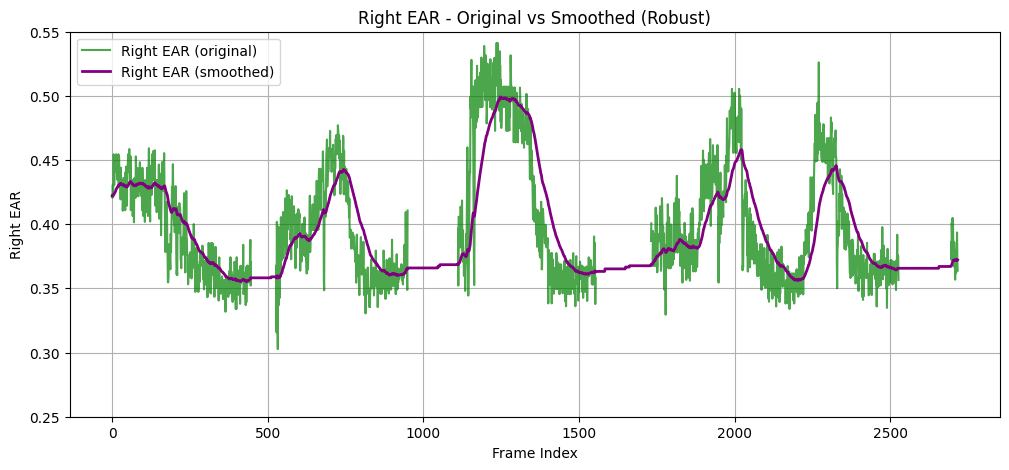

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Robust Exponential Smoothing
# -----------------------------
def robust_exponential_smoothing(series, alpha=0.2):
    smoothed = []
    prev = None
    for val in series:
        if np.isnan(val):
            # If current value is NaN, keep previous smoothed value or 0 if first value
            smoothed_val = prev if prev is not None else 0
        else:
            smoothed_val = alpha * val + (1 - alpha) * prev if prev is not None else val
        smoothed.append(smoothed_val)
        prev = smoothed_val
    return smoothed

# -----------------------------
# Load Data
# -----------------------------
file_path = "/content/020_noglasses_slowBlinkWithNodding_EAR_MAR.txt"
df = pd.read_csv(file_path, header=None, names=["timestamp", "left_ear", "right_ear", "mar"])

# -----------------------------
# Apply Robust Smoothing
# -----------------------------
df["right_ear_smooth"] = robust_exponential_smoothing(df["right_ear"], alpha=0.025)

# -----------------------------
# Plot Right EAR Only
# -----------------------------
plt.figure(figsize=(12, 5))
plt.plot(df["timestamp"], df["right_ear"], label="Right EAR (original)", color="green", alpha=0.7)
plt.plot(df["timestamp"], df["right_ear_smooth"], label="Right EAR (smoothed)", color="purple", linewidth=2)

plt.xlabel("Frame Index")
plt.ylabel("Right EAR")
plt.title("Right EAR - Original vs Smoothed (Robust)")
plt.ylim(.25, 0.55)
plt.legend()
plt.grid(True)
plt.show()


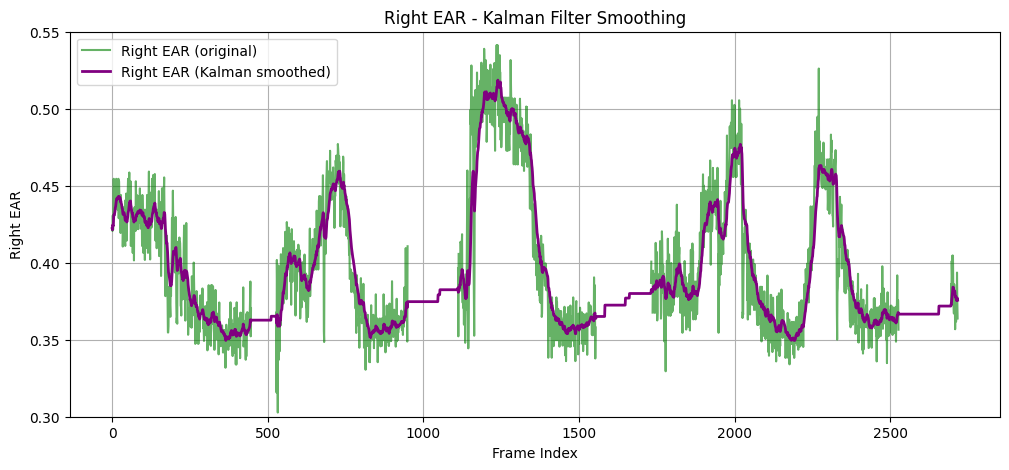

In [ ]:
!uv pip install filterpy -q
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from filterpy.kalman import KalmanFilter

# -----------------------------
# Load Data
# -----------------------------
file_path = "/content/020_noglasses_slowBlinkWithNodding_EAR_MAR.txt"
df = pd.read_csv(file_path, header=None, names=["timestamp", "left_ear", "right_ear", "mar"])
data = df["right_ear"].values

# -----------------------------
# Initialize Kalman Filter
# -----------------------------
kf = KalmanFilter(dim_x=1, dim_z=1)
kf.x = np.array([[data[0]]])       # initial state
kf.F = np.array([[1]])             # state transition matrix
kf.H = np.array([[1]])             # measurement function
kf.P = np.array([[1]])             # initial covariance
kf.R = np.array([[0.01]])          # measurement noise
kf.Q = np.array([[0.0001]])        # process noise

# -----------------------------
# Apply Kalman Filter
# -----------------------------
smoothed = []
for z in data:
    if np.isnan(z):
        smoothed.append(smoothed[-1] if smoothed else 0)
        continue
    kf.predict()
    kf.update(z)
    smoothed.append(kf.x[0, 0])

df["right_ear_kalman"] = smoothed

# -----------------------------
# Plot Original + Kalman Smoothed
# -----------------------------
plt.figure(figsize=(12, 5))
plt.plot(df["timestamp"], df["right_ear"], label="Right EAR (original)", color="green", alpha=0.6)
plt.plot(df["timestamp"], df["right_ear_kalman"], label="Right EAR (Kalman smoothed)", color="purple", linewidth=2)

plt.xlabel("Frame Index")
plt.ylabel("Right EAR")
plt.title("Right EAR - Kalman Filter Smoothing")
plt.ylim(0.3, 0.55)
plt.legend()
plt.grid(True)
plt.show()
